## Molecular dynamics application example

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-requirements" data-toc-modified-id="Pre-requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-requirements</a></span><ul class="toc-item"><li><span><a href="#Import-dependencies" data-toc-modified-id="Import-dependencies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import dependencies</a></span></li><li><span><a href="#Notebook-configuration" data-toc-modified-id="Notebook-configuration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notebook configuration</a></span></li><li><span><a href="#Package-configuration" data-toc-modified-id="Package-configuration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Package configuration</a></span></li></ul></li><li><span><a href="#MD-showcase---Langerin" data-toc-modified-id="MD-showcase---Langerin-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MD showcase - Langerin</a></span></li><li><span><a href="#Space-A" data-toc-modified-id="Space-A-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Space A</a></span><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Coreset-MSM-estimation" data-toc-modified-id="Coreset-MSM-estimation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Coreset MSM estimation</a></span><ul class="toc-item"><li><span><a href="#(MSM-on-train-data-dt-=-10-ns)" data-toc-modified-id="(MSM-on-train-data-dt-=-10-ns)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>(MSM on train data <em>dt</em> = 10 ns)</a></span></li></ul></li></ul></li><li><span><a href="#Space-B" data-toc-modified-id="Space-B-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Space B</a></span><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Coreset-MSM-estimation" data-toc-modified-id="Coreset-MSM-estimation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Coreset MSM estimation</a></span><ul class="toc-item"><li><span><a href="#(MSM-on-test-data-dt-=-0.1-ns)" data-toc-modified-id="(MSM-on-test-data-dt-=-0.1-ns)-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>(MSM on test data <em>dt</em> = 0.1 ns)</a></span></li></ul></li></ul></li></ul></div>

## Pre-requirements

### Import dependencies

In [1]:
# Primary imports
import importlib  # Only needed for module editing
import json
import pandas as pd  # Optional dependency
from pathlib import Path
import pprint
import sys
import time
import warnings
warnings.simplefilter("always")  # Surpress or enable warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets  # For sklearn test data set creation
from sklearn.preprocessing import StandardScaler

# CNN clustering module
import cnnclustering.cnn as cnn    # CNN clustering
import cnnclustering.cmsm as cmsm  # Core-set MSM estimation

This notebook was created using Python 3.8.

In [2]:
# Version information
print(sys.version)

3.8.3 (default, May 15 2020, 15:24:35) 
[GCC 8.3.0]


### Notebook configuration

We use `matplotlib` to create plots. A `"matplotlibrc"` file can be used to customise the appearance of the plots.

In [2]:
# Matplotlib configuration
mpl.rc_file(
    "matplotlibrc",
    use_default_template=False
)

In [3]:
# Axis property defaults for the plots
ax_props = {
    "xlabel": None,
    "ylabel": None,
    "xlim": (-2.5, 2.5),
    "ylim": (-2.5, 2.5),
    "xticks": (),
    "yticks": (),
    "aspect": "equal"
}

# Line plot property defaults
line_props = {
    "linewidth": 0,
    "marker": '.',
}

### Package configuration

In [6]:
# Configuration file found?
cnn.settings.cfgfile  # If None, no file is provided

In [7]:
# Display default settings
cnn.settings.defaults

{'default_cnn_cutoff': '1',
 'default_cnn_offset': '0',
 'default_radius_cutoff': '1',
 'default_member_cutoff': '2',
 'float_precision': 'sp',
 'int_precision': 'sp'}

## MD showcase - Langerin

In [57]:
langerin = cnn.CNN(points=[x[::20, :6] for x in np.load("../data/md_showcase_langerin.npy", allow_pickle=True)])

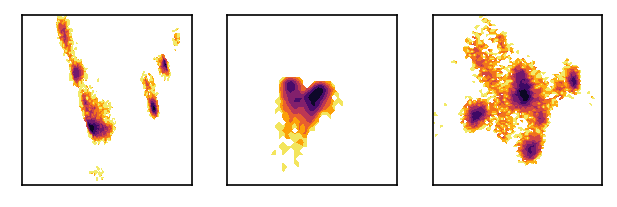

In [58]:
fig, Ax = plt.subplots(
    1, 3,
    figsize=(mpl.rcParams['figure.figsize'][0],
             mpl.rcParams['figure.figsize'][1]*0.5)
    )

for dim in range(3):
    _ = langerin.evaluate(
        ax=Ax[dim], plot="contourf",
        ax_props=ax_props,
        dim=(dim*2, dim*2 + 1)
        )

(<Figure size 750x450 with 1 Axes>,
 None)

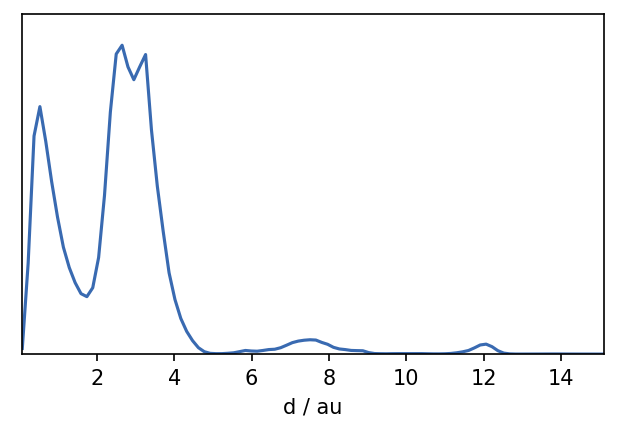

In [60]:
langerin.calc_dist()
langerin.dist_hist()

In [62]:
langerin.fit(2, 5)

Execution time for call of fit: 0 hours, 0 minutes, 21.9658 seconds
--------------------------------------------------------------------------------
#points   R         N         M         max       #clusters %largest  %noise    
13541     2.000     5         2         None      4         0.977     0.000     
--------------------------------------------------------------------------------


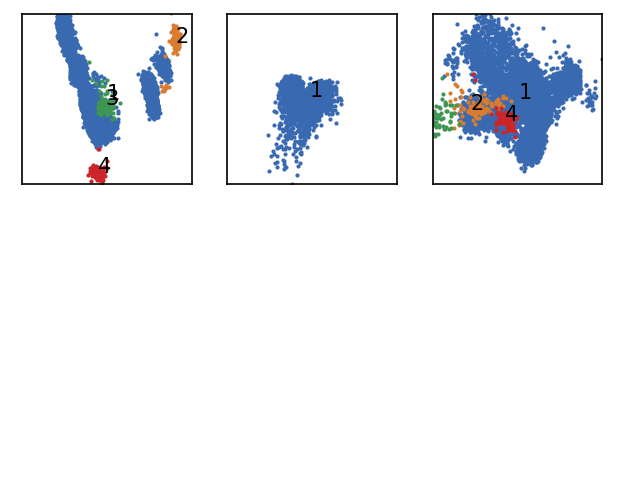

In [68]:
fig, Ax = plt.subplots(
    1, 3,
    figsize=(mpl.rcParams['figure.figsize'][0],
             mpl.rcParams['figure.figsize'][1]*0.5)
    )

for dim in range(3):
    _ = langerin.evaluate(
        ax=Ax[dim], plot="dots",
        ax_props=ax_props,
        dim=(dim*2, dim*2 + 1)
        )

In [69]:
langerin.isolate()

In [76]:
langerin._children[1].data.points.cKDtree()
langerin._children[1].calc_neighbours_from_cKDTree(r=1)
langerin._children[1].fit(1, 5)

Execution time for call of fit: 0 hours, 0 minutes, 0.9313 seconds
--------------------------------------------------------------------------------
#points   R         N         M         max       #clusters %largest  %noise    
13233     1.000     5         2         None      3         0.725     0.001     
--------------------------------------------------------------------------------


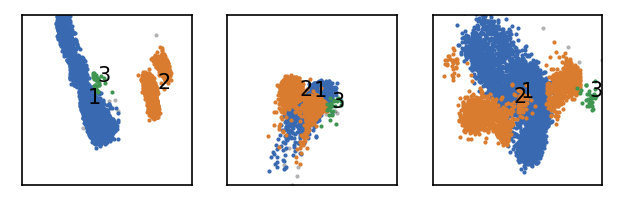

In [77]:
fig, Ax = plt.subplots(
    1, 3,
    figsize=(mpl.rcParams['figure.figsize'][0],
             mpl.rcParams['figure.figsize'][1]*0.5)
    )

for dim in range(3):
    _ = langerin._children[1].evaluate(
        ax=Ax[dim], plot="dots",
        ax_props=ax_props,
        dim=(dim*2, dim*2 + 1)
        )

<a name="space_a" />

## Space A

In [177]:
# Load the data
# 130 replica of holo-langerin;
# 100 ps time step;
# 5 dimensional TICA projection;
# 30 ns lag time, selected bb-dihedrals and H-bonds
proj = np.load('p30_5.npy', allow_pickle=True)
print(np.shape(proj), np.shape(proj[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'p30_5.npy'

In [25]:
# optionally reduce dimensionality
# for i in range(len(proj)):
#     proj[i] = proj[i][:, :3]

In [115]:
# initialise clustering
langerin = cnn.CNN(test=proj)
langerin.cut(points=(None, None, 100))
print(langerin)

Configuration file found in /home/janjoswig
cnn.CNN cluster object
--------------------------------------------------------------------------------
alias :                                  root
hierachy level :                         0

test data shape :                        Parts      - 130
                                         Points     - [4002, 2501, 2201, 2201, 2201, '...']
                                         Dimensions - 5

train data shape :                       Parts      - 130
                                         Points     - [41, 26, 23, 23, 23, '...']
                                         Dimensions - 5

distance matrix calculated (train) :     False
distance matrix calculated (test) :      False
clustered :                              False
children :                               False
--------------------------------------------------------------------------------



<a name="clustering" />

### Clustering

Train distance matrix not calculated. Calculating distance matrix.


(<Figure size 975.192x602.669 with 1 Axes>,
 [Text(0.35896362584191055, 0.7247888035798966, '0.36'),
  Text(1.7948178889355477, 0.43464846777076316, '1.79'),
  Text(3.2306721520291855, 0.2663797558984762, '3.23'),
  Text(7.251064088691371, 0.050229576941857444, '7.25'),
  Text(11.271456025353556, 0.018509623274021017, '11.27')])

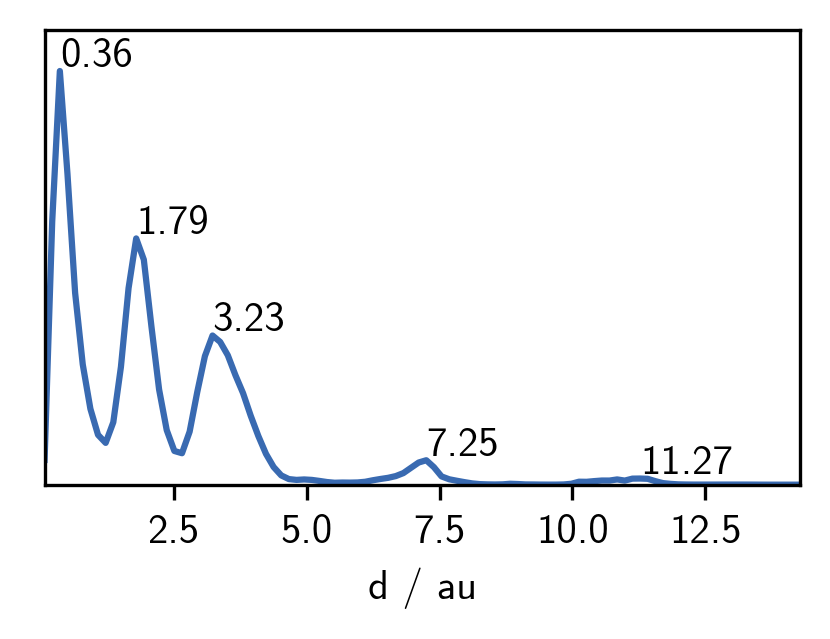

In [116]:
# Distance histogram
langerin.dist_hist(maxima=True, maxima_props={"order": 5})

In [118]:
# Axis property defaults for the following plots
ax_props2 = {
    "xlabel": None,
    "ylabel": None,
    "xticks": (),
    "yticks": (),
}

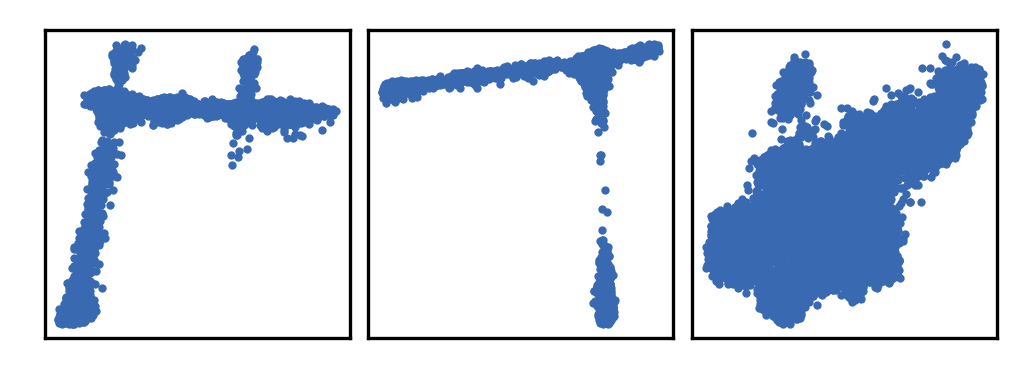

In [119]:
# Have a look at the original data ...
obj = langerin
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2, mode="test", original=True)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2), mode="test", original=True)
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4), mode="test", original=True)
fig.tight_layout(pad=0.1)

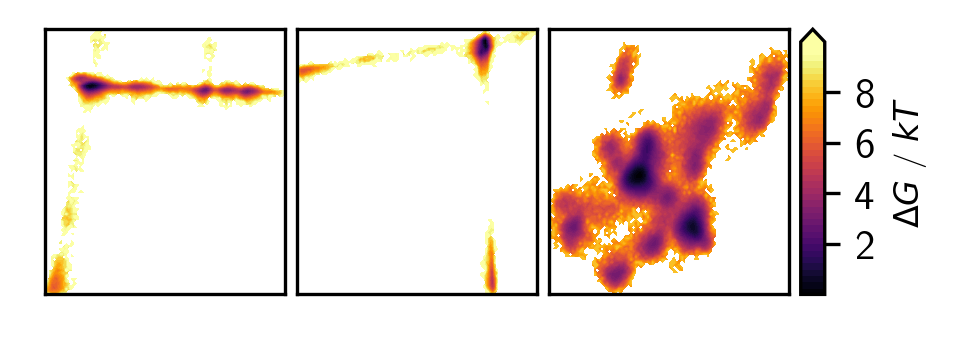

In [121]:
# Alternatively plot this as free energy landscape
obj = langerin
fig = plt.figure(figsize=(6.50128*0.5, 6.50128*0.2*0.618*1.1))
Ax = []
gspec = fig.add_gridspec(1, 22)
Ax.append(fig.add_subplot(gspec[0, :7]))
Ax.append(fig.add_subplot(gspec[0, 7:14]))
Ax.append(fig.add_subplot(gspec[0, 14:21]))
Ax.append(fig.add_subplot(gspec[0, -1]))
plotted = obj.evaluate(
    ax=Ax[0], ax_props=ax_props2,
    mode="test", original=True,
    plot='contourf', contour_props={"levels": 40, "vmin": 0, "vmax": 9.5, "extend": "max"}
    )[2]
obj.evaluate(
    ax=Ax[1], ax_props=ax_props2,
    dim=(1, 2),
    mode="test", original=True,
    plot='contourf', contour_props={"levels": 40, "vmin": 0, "vmax": 9.5}
    )
obj.evaluate(
    ax=Ax[2], ax_props=ax_props2,
    dim=(3, 4),
    mode="test", original=True,
    plot='contourf', contour_props={"levels": 40, "vmin": 0, "vmax": 9.5}
    )
# cbarax = fig.add_subplot(1, 20, 20)
cbar = fig.colorbar(mappable=plotted[0], cax=Ax[3], ticks=(2, 4, 6, 8))
cbar.set_label(r"$\Delta G$ / $kT$", fontsize=8)
fig.subplots_adjust(
    left=0, right=0.8, bottom=0, top=1, wspace=0.5, hspace=1 
    )

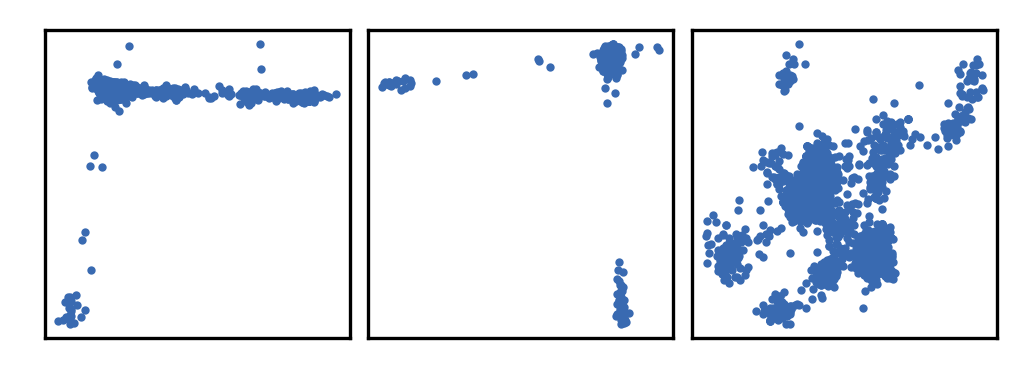

In [122]:
# ... and the reduced set
# Have a look at the original data
obj = langerin
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2, original=True)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2), original=True)
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4), original=True)
fig.tight_layout(pad=0.1)


-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
    3141      4.0    5     1    None         3         0.97453       0.0   
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 2.0126 seconds
recording: ...


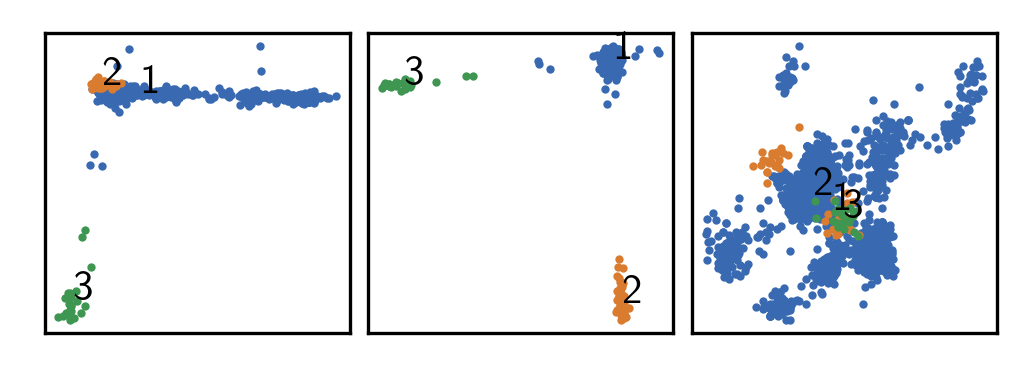

In [123]:
# Level 1
r, c = 4, 5
obj = langerin
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c_{r}_{c}.png")

In [124]:
# Isolate the result and prepare for level 2
langerin.isolate()
l1 = langerin.train_children[1]
l2 = langerin.train_children[2]
l3 = langerin.train_children[3]

Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig



-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
     24       1.0    0     1    None         2          0.875     0.041667 
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 0.0056 seconds
recording: ...


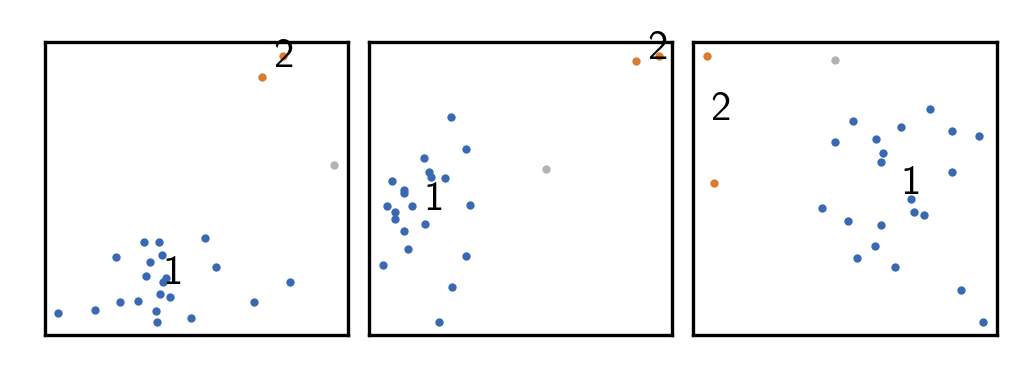

In [125]:
# Level 2, child 3
r, c = 1, 0
obj = l3
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c3_{r}_{c}.png")


-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
     56       0.8    5     1    None         2        0.553571    0.035714 
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 0.0058 seconds
recording: ...


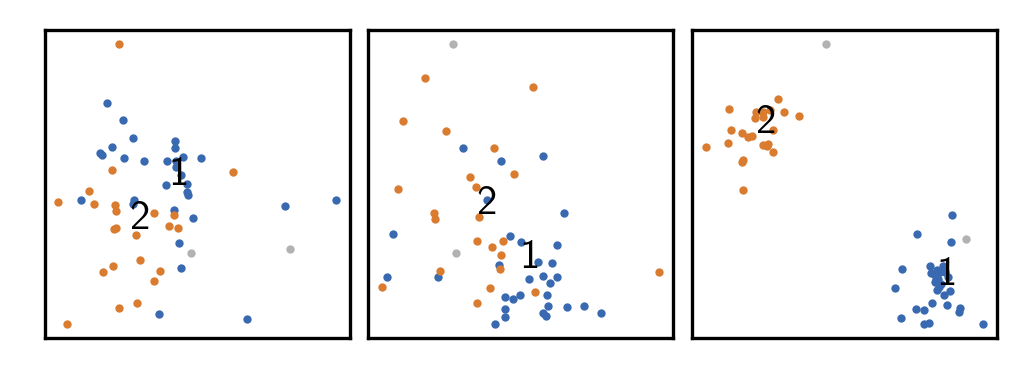

In [126]:
# Level 2, child 2
r, c = 0.8, 5
obj = l2
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c2_{r}_{c}.png")


-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
    3061      1.3    0     1    None         3        0.991833       0.0   
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 1.2624 seconds
recording: ...


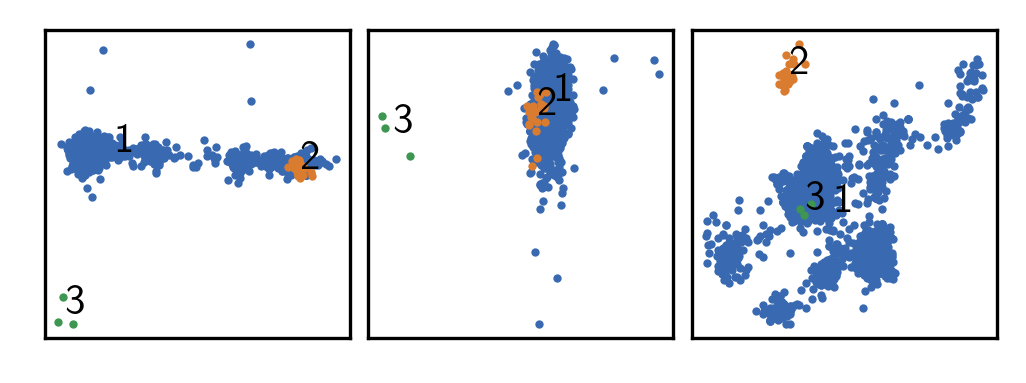

In [127]:
# Level 2, child 1
r, c = 1.3, 0
obj = l1
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_{r}_{c}.png")

In [128]:
# Isolate from l1 and prepare for level 3
l1.isolate()
l1_1 = l1.train_children[1]

Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig



-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
    3036      0.9    0     0    None         6        0.972661       0.0   
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 1.1927 seconds
recording: ...


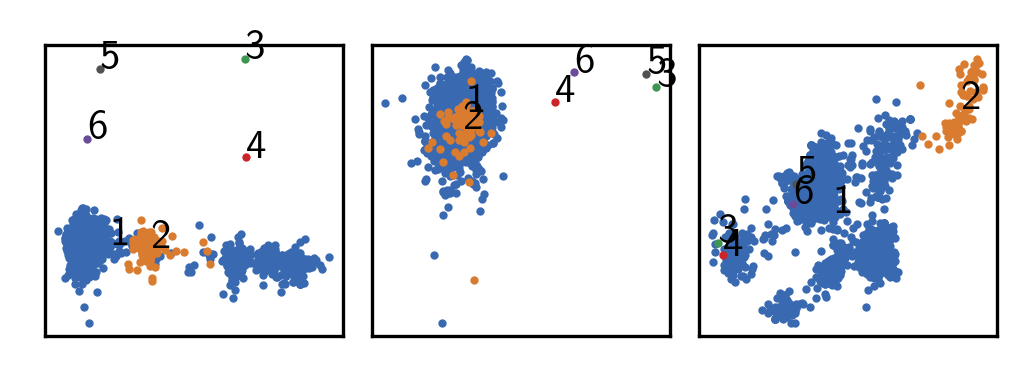

In [129]:
# Level 3, child 1
r, c = 0.9, 0
obj = l1_1
obj.fit(radius_cutoff=r, cnn_cutoff=c, member_cutoff=0)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_1_{r}_{c}.png")

In [130]:
# Isolate from l1_1 and prepare for level 4
l1_1.isolate()
l1_1_1 = l1_1.train_children[1]

Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig



-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
    2953      0.6   10     1    None         4        0.850999    0.013207 
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 0.8132 seconds
recording: ...


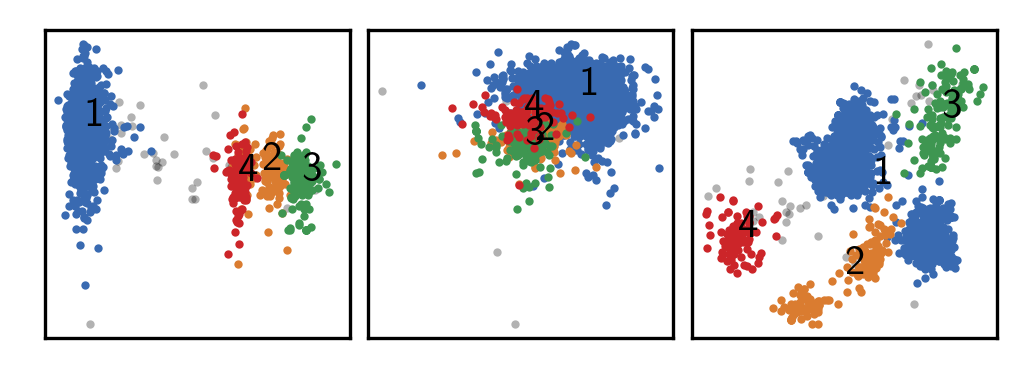

In [131]:
# Level 4, child 1
r, c = 0.6, 10
obj = l1_1_1
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_1_2_{r}_{c}.png")

In [132]:
# Isolate from l1_1_1 and prepare for level 5
l1_1_1.isolate()
l1_1_1_1 = l1_1_1.train_children[1]
l1_1_1_2 = l1_1_1.train_children[2]

Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig



-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
     158      0.4   15     1    None         2        0.525316    0.113924 
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 0.0100 seconds
recording: ...


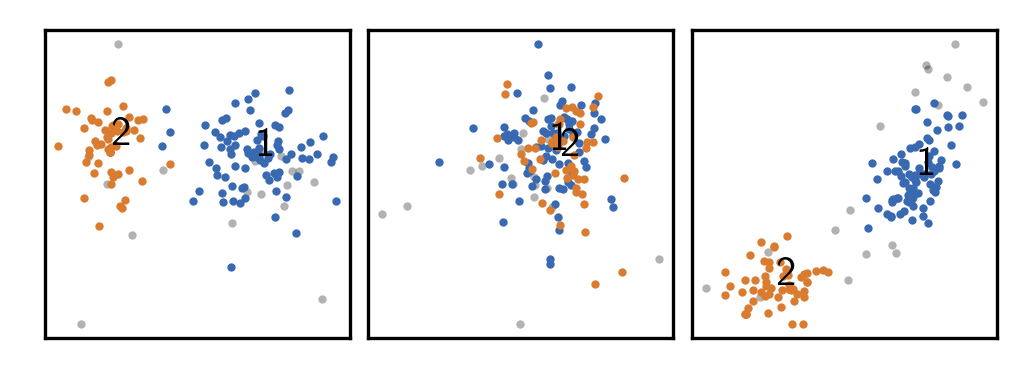

In [133]:
# Level 5, child 2
r, c = 0.4, 15
obj = l1_1_1_2
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_1_1_2_{r}_{c}.png")


-------------------------------------------------------------------------------
  #points     R     N     M     max     #clusters     %largest     %noise  
    2513      0.4   20     1    None         2        0.653402    0.024274 
-------------------------------------------------------------------------------
Execution time for call of fit():     0 hours, 0 minutes, 0.5373 seconds
recording: ...


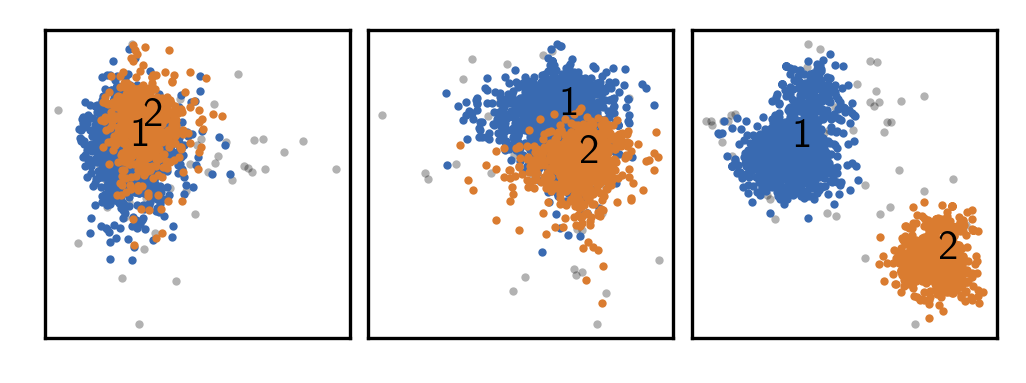

In [134]:
# Level 5, child 1
r, c = 0.4, 20
obj = l1_1_1_1
obj.fit(radius_cutoff=r, cnn_cutoff=c)
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_1_1_1_{r}_{c}.png")

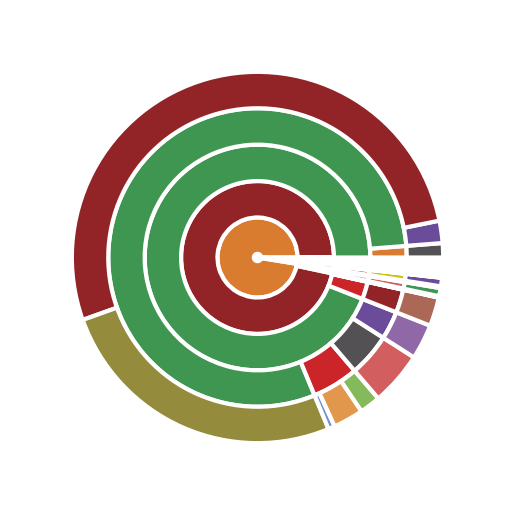

In [135]:
# Finished?
langerin.pie()

In [136]:
# Wrap up from child to parent
l1_1_1.reel()
l1_1.reel()
l1.reel()
langerin.reel()

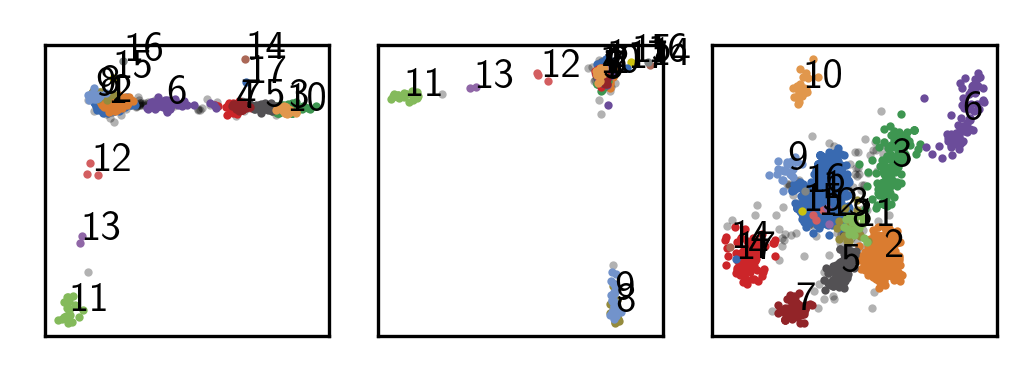

In [137]:
# Plot the total clustering result
obj = langerin
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=ax_props2)
obj.evaluate(ax=Ax[1], ax_props=ax_props2, dim=(1, 2))
obj.evaluate(ax=Ax[2], ax_props=ax_props2, dim=(3, 4))
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_1_1_2_{r}_{c}.png")

In [138]:
# Cluster size overview
print(json.dumps({k: len(v) for k, v in langerin.train_clusterdict.items()}, indent=4))

{
    "0": 121,
    "1": 1642,
    "2": 810,
    "3": 147,
    "4": 96,
    "5": 83,
    "6": 79,
    "7": 57,
    "8": 31,
    "9": 23,
    "10": 22,
    "11": 21,
    "12": 3,
    "13": 2,
    "14": 1,
    "15": 1,
    "16": 1,
    "17": 1
}


In [405]:
# store train set assignments
# np.save("train_labels_30_5.npy", langerin.train_labels)

In [9]:
# load train set assignments
langerin.train_labels = np.load("train_labels_30_5.npy", allow_pickle=True)
# translate label information into clusterdict information
langerin.labels2dict()

In [10]:
# Prepare distance matrices for lookup
langerin.dist()
langerin.map()

In [ ]:
# Predict labels for the test set
# Going from small to large
langerin.predict(0.2, 0, clusters=[14, 15, 16, 17], behaviour="lookup")

In [ ]:
langerin.predict(0.5, 1, clusters=[12, 13], behaviour="lookup")

In [ ]:
langerin.predict(0.5, 5, clusters=[10, 11], behaviour="lookup")

In [ ]:
langerin.predict(0.4, 20, clusters=[1, 2], behaviour="lookup")

In [ ]:
langerin.predict(0.4, 10, clusters=[3, 4, 5, 6, 7, 8, 9], behaviour="lookup")

In [ ]:
# Plot the total clustering result
obj = langerin
fig, Ax = plt.subplots(1, 3, figsize=(6.50128*0.5, 6.50128*0.25*0.618*1.1))
obj.evaluate(ax=Ax[0], ax_props=axprops, mode="test")
obj.evaluate(ax=Ax[1], ax_props=axprops, dim=(1, 2), mode="test")
obj.evaluate(ax=Ax[2], ax_props=axprops, dim=(3, 4), mode="test")
fig.tight_layout(pad=0.1)
# # fig.savefig(f"c1_1_1_2_{r}_{c}.png")

<a name="cmsm" />

### Coreset MSM estimation

#### (MSM on train data *dt* = 10 ns)

In [18]:
# Create an MSM object
M = cmsm.CMSM(langerin.get_dtraj(mode='train'), unit="ns", step=10)

In [21]:
# Estimate csMSM for different lag times (given in steps)
lags = [1, 2, 3, 4]
for i in lags:
    M.cmsm(lag=i, minlenfactor=5)
    M.get_its()


*********************************************************
---------------------------------------------------------
Computing coreset MSM at lagtime 10 ns
---------------------------------------------------------

Trajectories [38]
are shorter then step threshold (lag*minlenfactor = 5)
and will not be used to compute the MSM.

Using 129 trajectories with 3126 steps over 17 coresets
---------------------------------------------------------
*********************************************************


*********************************************************
---------------------------------------------------------
Computing coreset MSM at lagtime 20 ns
---------------------------------------------------------

Trajectories [38]
are shorter then step threshold (lag*minlenfactor = 10)
and will not be used to compute the MSM.

Using 129 trajectories with 3126 steps over 17 coresets
---------------------------------------------------------
****************************************************

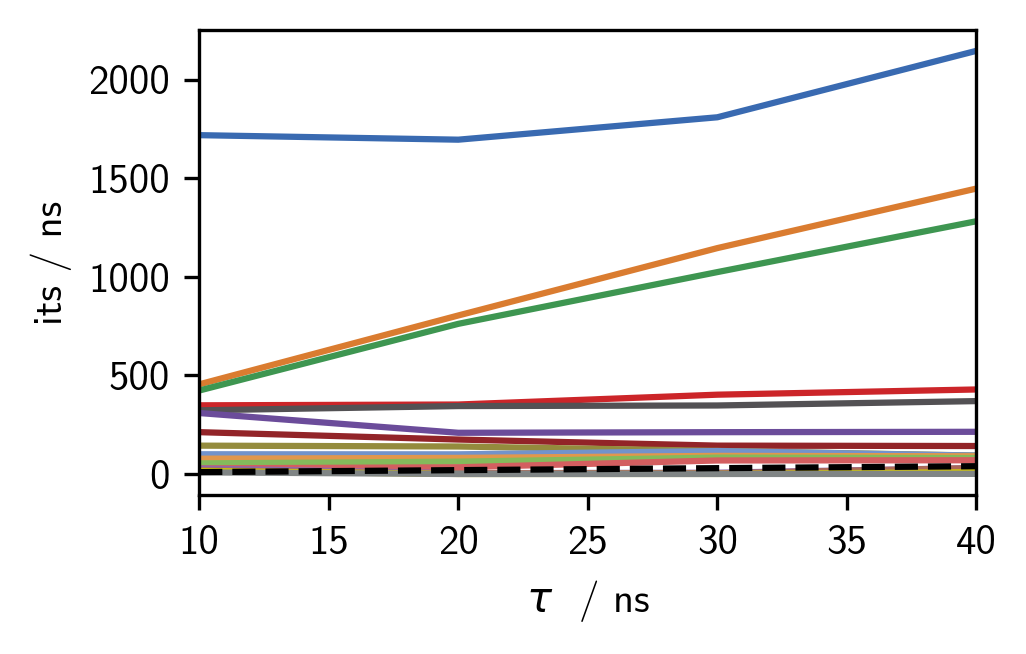

In [22]:
# Plot the time scales
fig, ax, *_ = M.plot_its()
fig.tight_layout(pad=0.1)

<a name="space_b" />

## Space B

In [139]:
# Load the data
# 130 replica of holo-langerin;
# 100 ps time step;
# 9 dimensional TICA projection;
# 9 ns lag time, selected bb-dihedrals and H-bonds
proj = np.load('p9_9.npy', allow_pickle=True)
print(np.shape(proj), np.shape(proj[0]))

(130,) (4002, 9)


In [140]:
# optionally reduce dimensionality
for i in range(len(proj)):
    proj[i] = proj[i][:, :3]

In [141]:
# initialise clustering
langerin_b = cnn.CNN(test=proj)
langerin_b.cut(points=(None, None, 100))
print(langerin_b)

Configuration file found in /home/janjoswig
cnn.CNN cluster object
--------------------------------------------------------------------------------
alias :                                  root
hierachy level :                         0

test data shape :                        Parts      - 130
                                         Points     - [4002, 2501, 2201, 2201, 2201, '...']
                                         Dimensions - 3

train data shape :                       Parts      - 130
                                         Points     - [41, 26, 23, 23, 23, '...']
                                         Dimensions - 3

distance matrix calculated (train) :     False
distance matrix calculated (test) :      False
clustered :                              False
children :                               False
--------------------------------------------------------------------------------



# [...]

<a name="clustering_b" />

### Clustering

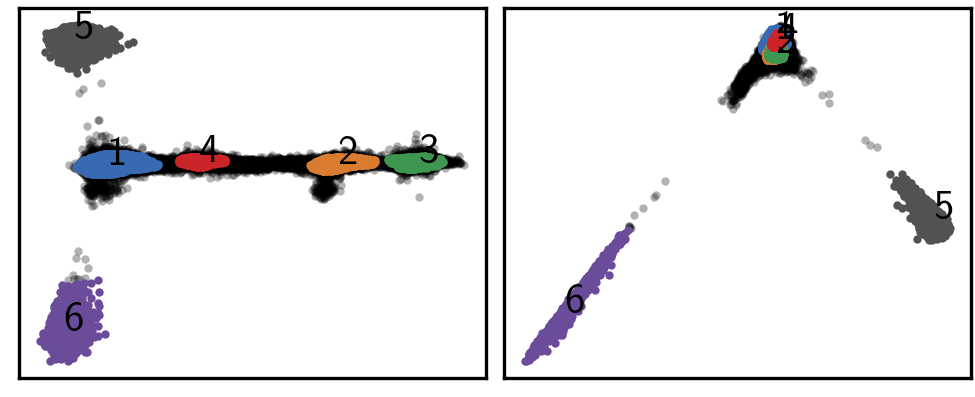

In [142]:
# You can also use this clustering and skip the prediction ...
Image("c_predicted_9_3.png")

In [143]:
# load train and test set assignments
langerin_b.train_labels = np.load("train_labels_9_3.npy", allow_pickle=True)
langerin_b.test_labels = np.load("test_labels_9_3.npy", allow_pickle=True)
# translate label information into clusterdict information
langerin_b.labels2dict()
langerin_b.labels2dict(mode="test")

<a name="cmsm_b" />

### Coreset MSM estimation

#### (MSM on test data *dt* = 0.1 ns)

In [144]:
# Create an MSM object
MB = cmsm.CMSM(langerin_b.get_dtraj(mode='test'), unit="ns", step=0.1)

In [145]:
# Estimate csMSM for different lag times (given in steps)
lags = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300]
for i in lags:
    MB.cmsm(lag=i, minlenfactor=5)
    MB.get_its()


*********************************************************
---------------------------------------------------------
Computing coreset MSM at lagtime 0.1 ns
---------------------------------------------------------

Using 130 trajectories with 301170 steps over 6 coresets
---------------------------------------------------------
*********************************************************


*********************************************************
---------------------------------------------------------
Computing coreset MSM at lagtime 1.0 ns
---------------------------------------------------------

Using 130 trajectories with 301170 steps over 6 coresets
---------------------------------------------------------
*********************************************************


*********************************************************
---------------------------------------------------------
Computing coreset MSM at lagtime 2.0 ns
---------------------------------------------------------

Traj

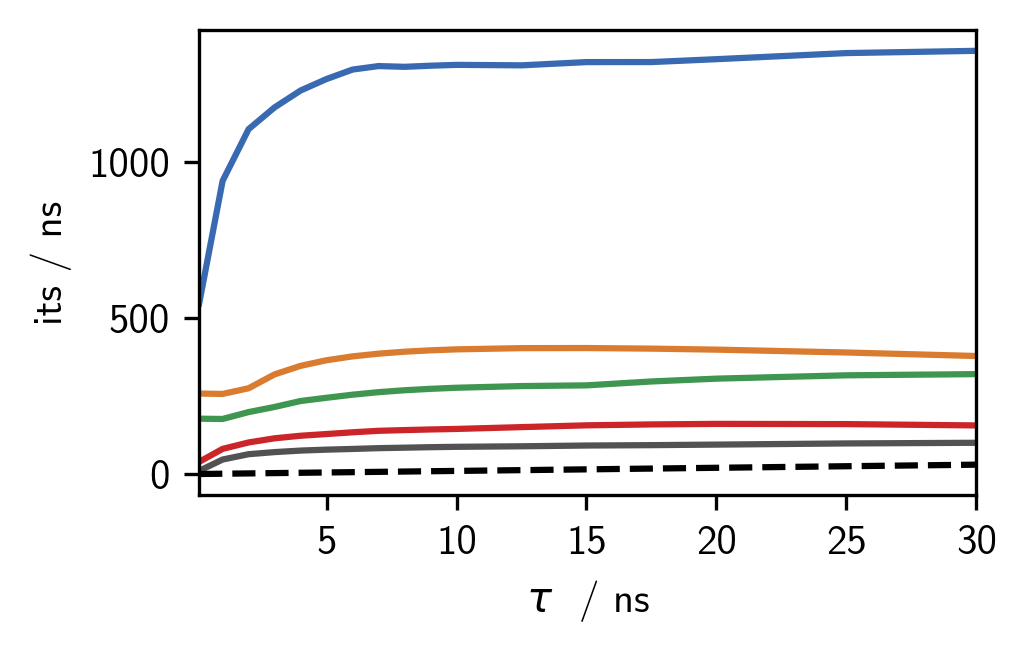

In [146]:
# Plot the implied time scales
fig, ax, *_ = MB.plot_its()
fig.tight_layout(pad=0.1)

In [147]:
# A Model at lag time 10 ns might be a good choice
MB.cmsm(lag=100)
MB.get_its()


*********************************************************
---------------------------------------------------------
Computing coreset MSM at lagtime 10.0 ns
---------------------------------------------------------

Trajectories [38]
are shorter then step threshold (lag*minlenfactor = 1000)
and will not be used to compute the MSM.

Using 129 trajectories with 301089 steps over 6 coresets
---------------------------------------------------------
*********************************************************



In [148]:
# Transition matrix
MB.T

array([[ 9.96803579e-01,  2.88007674e-04, -2.90934852e-07,
         1.85104164e-03,  7.84927156e-04,  2.72735582e-04],
       [ 2.67709646e-03,  9.68344445e-01,  2.16534956e-02,
         7.32579034e-03, -4.98370471e-08, -7.77422813e-07],
       [-7.50856852e-05,  3.43212694e-02,  9.52231599e-01,
         1.35221937e-02,  1.39780127e-09,  2.18047147e-08],
       [ 5.29790349e-02,  2.23999339e-02,  2.60014695e-02,
         8.98635933e-01, -9.86262053e-07, -1.53849930e-05],
       [ 3.47243911e-02,  1.40713811e-08, -1.42143962e-11,
        -6.79784120e-06,  9.65292477e-01, -1.00838853e-05],
       [ 2.44734782e-02,  9.91739893e-09, -1.00181948e-11,
        -4.79106511e-06, -4.55600275e-07,  9.75531759e-01]])

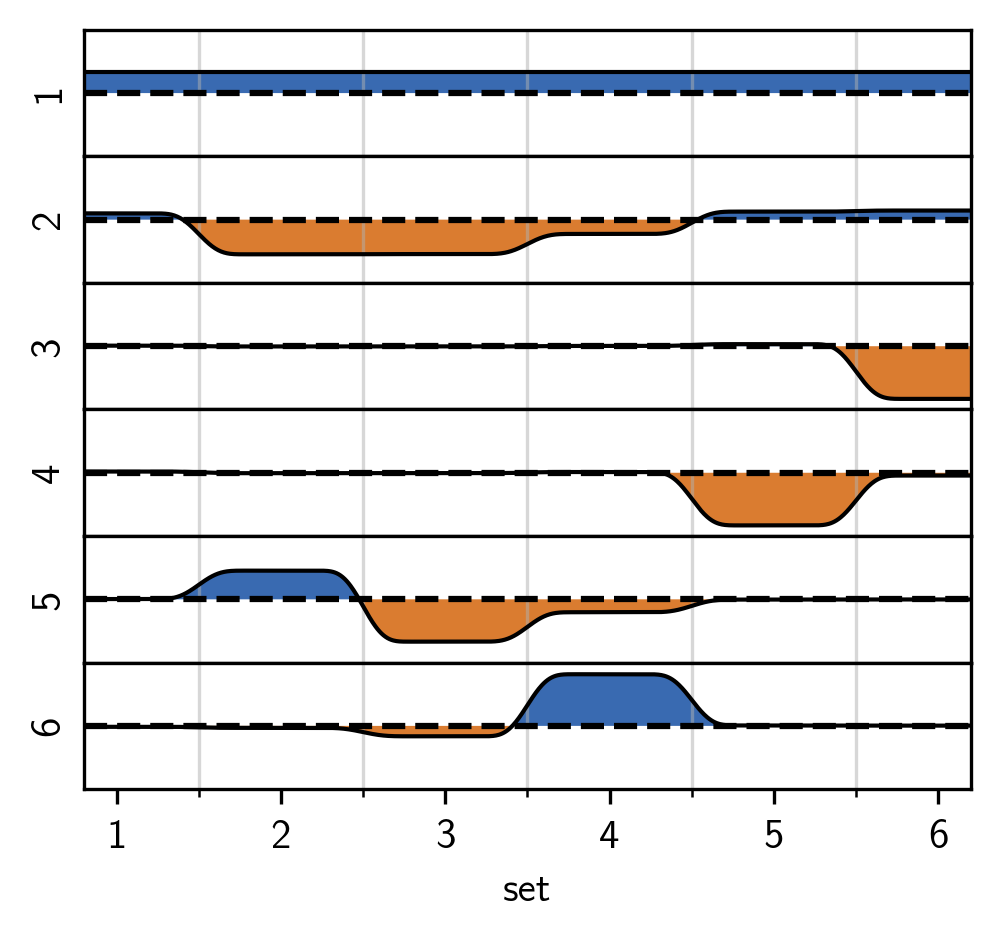

In [149]:
# You can plot the eigenvectors of the transition matrix (right)
mpl.rcParams['figure.figsize'] = 6.50128*0.5, 6.50128*0.5*0.618*1*0.25
fig, Ax = MB.plot_eigenvectors()
fig.subplots_adjust(
    left=0.08,
    bottom=0.15,
    right=0.99,
    top=0.99,
    wspace=None,
    hspace=0
    )

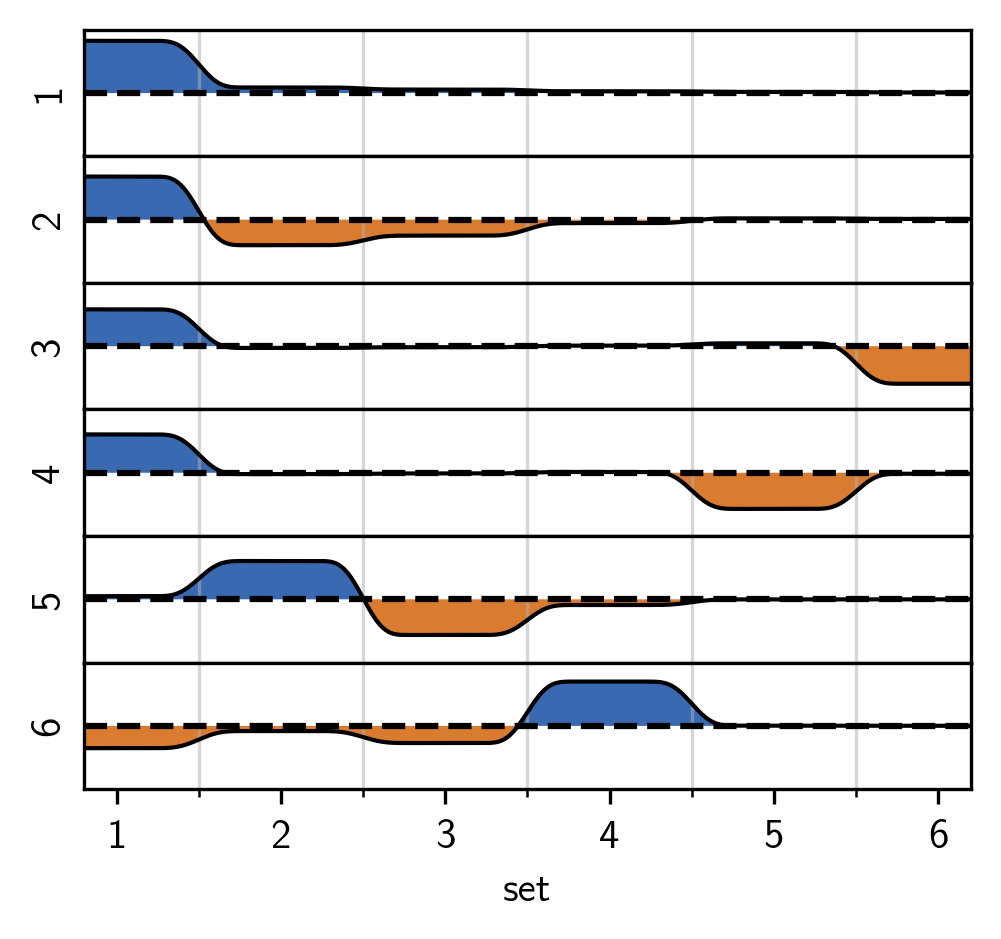

In [150]:
# You can plot the eigenvectors of the transition matrix (left)
mpl.rcParams['figure.figsize'] = 6.50128*0.5, 6.50128*0.5*0.618*1*0.25
fig, Ax = MB.plot_eigenvectors(which="left", invert=True)
fig.subplots_adjust(
    left=0.08,
    bottom=0.15,
    right=0.99,
    top=0.99,
    wspace=None,
    hspace=0
    )

<a name="benchmark" />

# Benchmark framework

In [ ]:
# Coming soon